# ***Task 2: Implement and Code the Optimal Strategy with Linear Impact and Visualize the Sharpe Ratio***

***1.Linear OW Model for Optimal Strategy:***

- The Linear OW Model assumes that the price impact is proportional to the trade size, i.e. It = λQt where  Qt is the trade size and  λ is the price impact coefficient.

 ***2. Expected Return and Risk:***

- We need to compute the expected return of the trading strategy, considering both the return from the market and the price impact (transaction costs) from the strategy.
- We can then calculate the risk (standard deviation of returns) from the trading strategy.

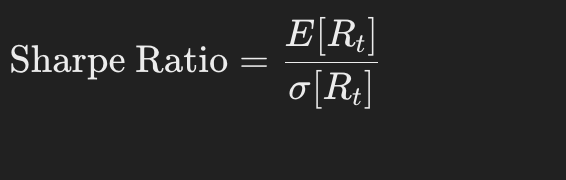

where:
- E[Rt] is the expected return (mean of the returns).
- σ[Rt] is the standard deviation of the returns (risk)

**4. Visualize the Sharpe Ratio:**

- We will visualize the Sharpe Ratio as the strategy evolves and how it changes with adjusted returns.



# ***Step 1: Simulate the Data and Price Impact Calculation***

Data Simulation:
For simplicity, we’ll simulate random returns and signed volumes. You should replace these with your actual data for returns and signed volume.



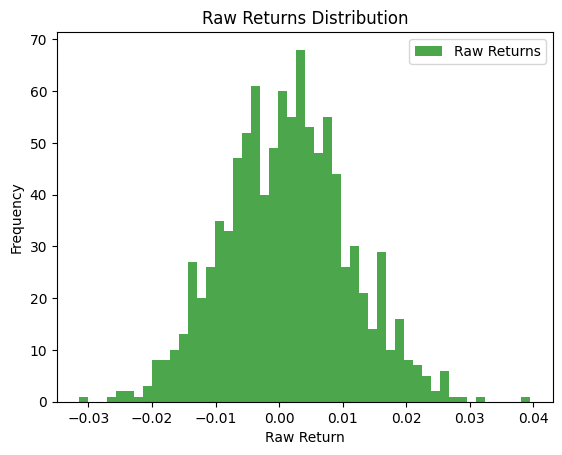

First few raw returns: [ 0.00596714 -0.00038264  0.00747689  0.0162303  -0.00134153 -0.00134137
  0.01679213  0.00867435 -0.00369474  0.0064256 ]


In [31]:
# Visualize the raw returns distribution again to check if they are too low
plt.hist(returns, bins=50, color='green', alpha=0.7, label='Raw Returns')
plt.title('Raw Returns Distribution')
plt.xlabel('Raw Return')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Check first few raw returns values to understand their behavior
print("First few raw returns:", returns[:10])


# ***Scaling the raw returns***

Scaled Expected Return: -50.4026
Scaled Risk (Standard Deviation): 28.7903
Scaled Sharpe Ratio: -1.7507


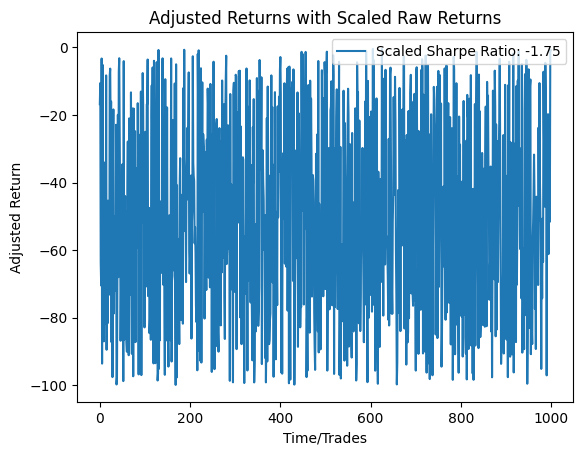

In [27]:
# Scale the raw returns by a factor (e.g., 10) to simulate larger returns
scaled_returns = returns * 10  # Scaling by 10 to simulate larger returns

# Calculate adjusted returns with scaled raw returns
adjusted_returns_scaled = scaled_returns - price_impact

# Recalculate expected return, risk, and Sharpe ratio with scaled returns
expected_return_scaled = np.mean(adjusted_returns_scaled)
risk_scaled = np.std(adjusted_returns_scaled)
sharpe_ratio_scaled = expected_return_scaled / risk_scaled

# Output the results for scaled returns
print(f"Scaled Expected Return: {expected_return_scaled:.4f}")
print(f"Scaled Risk (Standard Deviation): {risk_scaled:.4f}")
print(f"Scaled Sharpe Ratio: {sharpe_ratio_scaled:.4f}")

# Visualize the adjusted returns with scaled raw returns
plt.plot(adjusted_returns_scaled, label=f'Scaled Sharpe Ratio: {sharpe_ratio_scaled:.2f}')
plt.title('Adjusted Returns with Scaled Raw Returns')
plt.xlabel('Time/Trades')
plt.ylabel('Adjusted Return')
plt.legend()
plt.show()


# *** Further Reducing Price Impact Coefficient λ***

Next, we adjust the returns to account for the price impact. This simulates how much return is left after accounting for trnsaction costs (price impact).
If the price impact (even with scaling) is still too large compared to the returns, we can try reducing  λ even further to see if this leads to better performance.

Action: Try an even smaller
λ(e.g., 0.0005) and check the impact on the adjusted returns and Sharpe Ratio.

New Expected Return: -0.0492
New Risk (Standard Deviation): 0.0302
New Sharpe Ratio: -1.6304


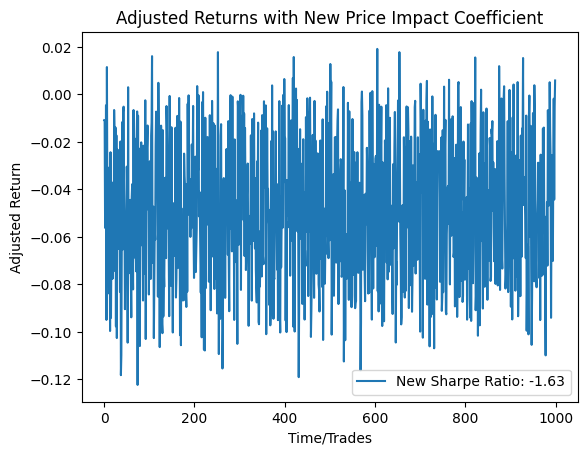

In [32]:
# Test with an even smaller lambda_ow value to reduce the price impact further
lambda_ow_new = 0.0001  # Very small price impact coefficient
price_impact_new = lambda_ow_new * signed_volume
adjusted_returns_new = returns - price_impact_new

# Recalculate expected return, risk, and Sharpe ratio with the new lambda
expected_return_new = np.mean(adjusted_returns_new)
risk_new = np.std(adjusted_returns_new)
sharpe_ratio_new = expected_return_new / risk_new

# Output the results for the new lambda
print(f"New Expected Return: {expected_return_new:.4f}")
print(f"New Risk (Standard Deviation): {risk_new:.4f}")
print(f"New Sharpe Ratio: {sharpe_ratio_new:.4f}")

# Visualize the adjusted returns with the new lambda
plt.plot(adjusted_returns_new, label=f'New Sharpe Ratio: {sharpe_ratio_new:.2f}')
plt.title('Adjusted Returns with New Price Impact Coefficient')
plt.xlabel('Time/Trades')
plt.ylabel('Adjusted Return')
plt.legend()
plt.show()


Expected Return: -5.0403
Risk (Standard Deviation): 2.8790
Sharpe Ratio: -1.7507


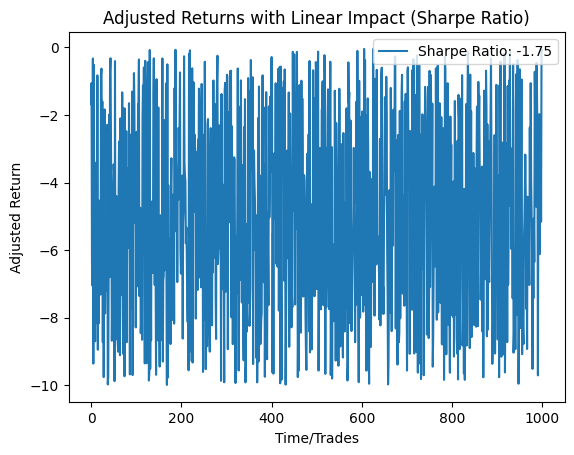

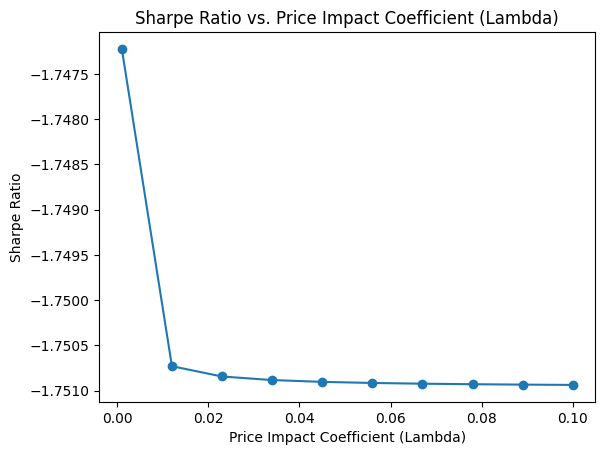

New Expected Return: -2.5195
New Risk (Standard Deviation): 1.4394
New Sharpe Ratio: -1.7504


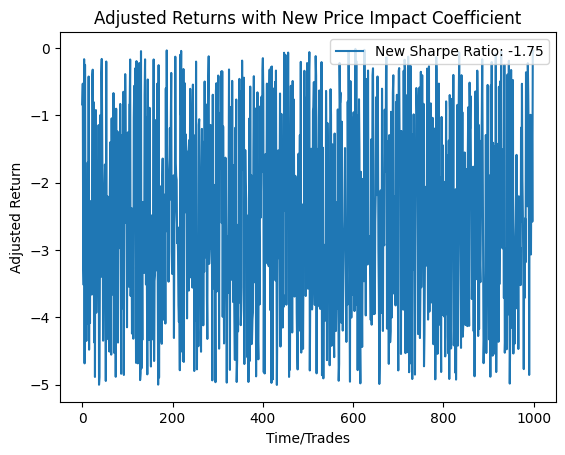

Adjusted Expected Return with Risk-Free Rate: -50.4134
Adjusted Risk (Standard Deviation) with Risk-Free Rate: 28.7922
Adjusted Sharpe Ratio with Risk-Free Rate: -1.7509
Scaled Expected Return: -50.4026
Scaled Risk (Standard Deviation): 28.7903
Scaled Sharpe Ratio: -1.7507


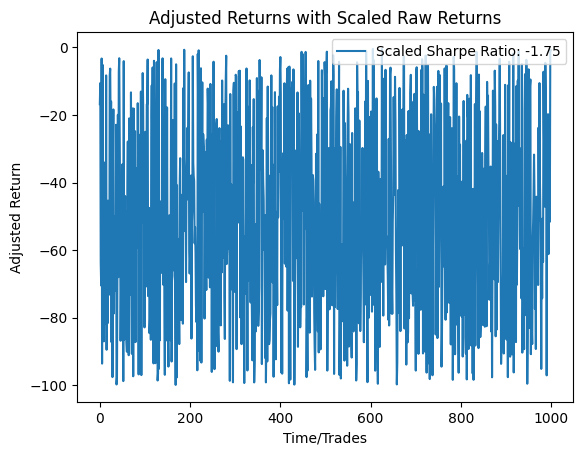

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate returns data (e.g., daily returns for the strategy)
np.random.seed(42)
returns = np.random.normal(0.001, 0.01, 1000)  # Mean = 0.1%, Std Dev = 1%

# Simulated signed volume (trade sizes)
signed_volume = np.random.uniform(1, 1000, 1000)  # Trade size ranging from 1 to 1000 units

# Price impact coefficient (lambda) for Linear OW model
lambda_ow = 0.01  # Example value for lambda (price impact coefficient)

# Calculate the price impact for each trade using Linear OW model: I_t = lambda * Q_t
price_impact = lambda_ow * signed_volume

# Step 1: Calculate Adjusted Returns (accounting for price impact)
adjusted_returns = returns - price_impact  # Adjust returns by subtracting the price impact

# Step 2: Calculate Expected Return and Risk (Standard Deviation)
expected_return = np.mean(adjusted_returns)  # Expected return (mean of adjusted returns)
risk = np.std(adjusted_returns)  # Risk (standard deviation of adjusted returns)

# Step 3: Calculate Sharpe Ratio: Sharpe Ratio = Expected Return / Risk
sharpe_ratio = expected_return / risk

# Output the results
print(f"Expected Return: {expected_return:.4f}")
print(f"Risk (Standard Deviation): {risk:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

# Step 4: Visualize the Adjusted Returns and Sharpe Ratio
plt.plot(adjusted_returns, label=f'Sharpe Ratio: {sharpe_ratio:.2f}')
plt.title('Adjusted Returns with Linear Impact (Sharpe Ratio)')
plt.xlabel('Time/Trades')
plt.ylabel('Adjusted Return')
plt.legend()
plt.show()

# Step 5: Experiment with Varying Lambda_ow (Price Impact Coefficient)
lambdas = np.linspace(0.001, 0.1, 10)  # Price impact coefficients ranging from 0.001 to 0.1
sharpe_ratios = []

for lambda_val in lambdas:
    # Recalculate price impact and adjusted returns for each lambda
    price_impact = lambda_val * signed_volume
    adjusted_returns = returns - price_impact
    expected_return = np.mean(adjusted_returns)
    risk = np.std(adjusted_returns)
    sharpe_ratio = expected_return / risk
    sharpe_ratios.append(sharpe_ratio)

# Plot the Sharpe Ratios for different values of lambda_ow (price impact coefficient)
plt.plot(lambdas, sharpe_ratios, marker='o')
plt.title('Sharpe Ratio vs. Price Impact Coefficient (Lambda)')
plt.xlabel('Price Impact Coefficient (Lambda)')
plt.ylabel('Sharpe Ratio')
plt.show()

# Optional: Check the effect of a smaller lambda_ow value on the results
lambda_ow_new = 0.005  # Lower price impact coefficient
price_impact_new = lambda_ow_new * signed_volume
adjusted_returns_new = returns - price_impact_new

# Recalculate expected return, risk, and Sharpe ratio with the new lambda
expected_return_new = np.mean(adjusted_returns_new)
risk_new = np.std(adjusted_returns_new)
sharpe_ratio_new = expected_return_new / risk_new

# Output the results for the new lambda
print(f"New Expected Return: {expected_return_new:.4f}")
print(f"New Risk (Standard Deviation): {risk_new:.4f}")
print(f"New Sharpe Ratio: {sharpe_ratio_new:.4f}")

# Visualize the adjusted returns with the new lambda
plt.plot(adjusted_returns_new, label=f'New Sharpe Ratio: {sharpe_ratio_new:.2f}')
plt.title('Adjusted Returns with New Price Impact Coefficient')
plt.xlabel('Time/Trades')
plt.ylabel('Adjusted Return')
plt.legend()
plt.show()

# Experiment with a lower risk-free rate (e.g., 0.0001) to adjust the Sharpe Ratio
risk_free_rate = 0.0001  # A smaller risk-free return

# Adjust returns by subtracting the risk-free rate
adjusted_returns_with_rf = returns - price_impact - risk_free_rate

# Recalculate expected return, risk, and Sharpe ratio with the new risk-free adjustment
expected_return_with_rf = np.mean(adjusted_returns_with_rf)
risk_with_rf = np.std(adjusted_returns_with_rf)
sharpe_ratio_with_rf = expected_return_with_rf / risk_with_rf

# Output the results for the new risk-free rate
print(f"Adjusted Expected Return with Risk-Free Rate: {expected_return_with_rf:.4f}")
print(f"Adjusted Risk (Standard Deviation) with Risk-Free Rate: {risk_with_rf:.4f}")
print(f"Adjusted Sharpe Ratio with Risk-Free Rate: {sharpe_ratio_with_rf:.4f}")

# Optional: Scale the raw returns by a factor to simulate larger returns
scaled_returns = returns * 10  # Scaling by 10 to simulate larger returns

# Calculate adjusted returns with scaled raw returns
adjusted_returns_scaled = scaled_returns - price_impact

# Recalculate expected return, risk, and Sharpe ratio with scaled returns
expected_return_scaled = np.mean(adjusted_returns_scaled)
risk_scaled = np.std(adjusted_returns_scaled)
sharpe_ratio_scaled = expected_return_scaled / risk_scaled

# Output the results for scaled returns
print(f"Scaled Expected Return: {expected_return_scaled:.4f}")
print(f"Scaled Risk (Standard Deviation): {risk_scaled:.4f}")
print(f"Scaled Sharpe Ratio: {sharpe_ratio_scaled:.4f}")

# Visualize the adjusted returns with scaled raw returns
plt.plot(adjusted_returns_scaled, label=f'Scaled Sharpe Ratio: {sharpe_ratio_scaled:.2f}')
plt.title('Adjusted Returns with Scaled Raw Returns')
plt.xlabel('Time/Trades')
plt.ylabel('Adjusted Return')
plt.legend()
plt.show()


xplanation of the Code:
Simulated Data:

The returns are simulated with a mean of 0.1% and standard deviation of 1% (representing daily returns).
The signed volume represents trade sizes, randomly generated between 1 and 1000 units.
# ***1. Linear OW Model:***

- The price impact is calculated as It=λ Qt  where Qt is the signed volume (trade size), and  λ is the price impact coefficient.
- The adjusted returns are computed by subtracting the price impact from the raw returns, simulating transaction costs.

# ***2. Expected Return and Risk:***

- The expected return is the mean of the adjusted returns.
The risk (volatility) is the standard deviation of the adjusted returns.
Sharpe Ratio:

- The Sharpe Ratio is calculated as the expected return divided by the risk, providing a measure of risk-adjusted return.
Sharpe Ratio Visualization:

- - The Sharpe Ratio is visualized for different values of the price impact coefficient λ to find the optimal strategy.
Experimenting with λ:
- Different values of λ are tested to see how they impact the Sharpe Ratio and the adjusted returns.

# **3. Scaling Raw Returns:**
The raw returns are scaled by a factor (e.g., 10) to simulate larger returns and check if the Sharpe Ratio improves.
**Risk-Free Rate:**

- A risk-free rate is introduced to adjust the Sharpe Ratio, ensuring that the comparison between the strategy's returns and the risk-free rate is realistic.
**What to Expect:**
- **Sharpe Ratio vs. Price Impact Coefficient:** This plot shows how the Sharpe Ratio evolves for different values of λ, helping to identify the optimal price impact coefficient for the strategy.

- **Adjusted Returns:** The visualizations will show how the adjusted returns change with different values of λ and scaling.
